# Estatística - Teste de Hipótese

<b>Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de
dados de um hospital que trata de pacientes com problemas cardíacos.
Considere a base como a população, portanto as estatísticas da população
são conhecidas. Responda as perguntas </b>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from tabulate import tabulate ## para fazer tabelas

### Leituras iniciais

In [204]:
df_pacientes = pd.read_csv('pacientes.csv')
df_pacientes.head(3)

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais


In [4]:
print(df_pacientes.info())
print('\n****FORMATO****\n{} linhas\n{} colunas\n'.format(df_pacientes.shape[0],df_pacientes.shape[1]))
df_describe = df_pacientes.describe().drop(['Unnamed: 0','Genero','Etnia','Estado_Saude'], axis=1)
print(df_describe)
print('\n{}'.format(df_pacientes['Nome_Genero'].value_counts()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB
None

****FORMATO****
1000 linhas
9 colunas

       Pressao_Arterial        Idade
count       1000.000000  1000.000000
mean         150.375623    49.757000
std            9.943613    11.682998
min          112.929821    30.000000
25%          144.240948    40.000000
50%          150.455624    49.000000


### Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

In [69]:
'''
TESTE Z
amostra > 30
desvio padrão populacional conhecido

H0: A idade média das pessoas com problemas cardíacos é > 50
anos
Ha: A idade média das pessoas com problemas cardíaco é < 50 anos

alpha = 0.05
'''

amostra_45 = df_pacientes.loc[df_pacientes['Unnamed: 0'].isin([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362])]

mean_idade_amostra = amostra_45['Idade'].mean()
mean_idade_populacao = df_pacientes['Idade'].mean()
std_idade_populacao = df_pacientes['Idade'].std()
amostra = 45
alpha = 0.05

# Estatística de Teste
z = ((mean_idade_amostra - mean_idade_populacao)/(std_idade_populacao/(math.sqrt(amostra))))
p_value = stats.norm.cdf(z)

if p_value < alpha:
    print("hipótese nula rejeitada")
else:
    print("hipótese nula não rejeitada")

print(p_value)

hipótese nula não rejeitada
0.621404882752189


In [42]:
'''
COM TESTE T
'''

amostra1 = amostra_45['Idade'].values

# Realizando o teste t
t_statistic, p_value = stats.ttest_1samp(amostra1, 50)

if p_value < alpha:
    print("hipótese nula rejeitada")
else:
    print("hipótese nula não rejeitada")

print(p_value)

hipótese nula não rejeitada
0.8649187935739622


### Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ouindependente?

Consideramos amostras independentes, amostras seriam consideradas dependentes se as observações em uma amostra estivessem relacionadas ou fossem influenciadas pelas observações na outra amostra. Um exemplo de amostras dependentes seria um estudo que compara o mesmo grupo de pessoas antes e depois de uma intervenção médica, onde as observações em uma amostra são dependentes das observações na outra amostra.

### Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [137]:
'''
TESTE T

H0 = pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde
Ha = pressão arterial média para pacientes com condições de saúde adicionais é menor ou maior que à pressão arterial média para pacientes sem condições adicionais de saúde

Hipótese bilateral

alpha = 0.06


'''

a = 0.06

amostra_aleatoria = df_pacientes.loc[df_pacientes['Unnamed: 0'].isin([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966])]
amostra_saudavel = amostra_aleatoria['Pressao_Arterial'].loc[amostra_aleatoria['Nome_Estado_Saude'] == 'Saudável']
amostra_adicional = amostra_aleatoria['Pressao_Arterial'].loc[amostra_aleatoria['Nome_Estado_Saude'] !=  'Saudável']

# Realizando o teste t
t_statistic, p_value = stats.ttest_ind(amostra_adicional, amostra_saudavel)


if p_value < a:
    print("hipótese nula rejeitada")
else:
    print("hipótese nula não rejeitada")
print(p)

hipótese nula não rejeitada
0.4453521758196194


### Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)
* a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.
* b. HiExiste uma associação entre a idade dos pacientes e sua pressão arterial?
    * i. Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.
    * ii. Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.
* c. pótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

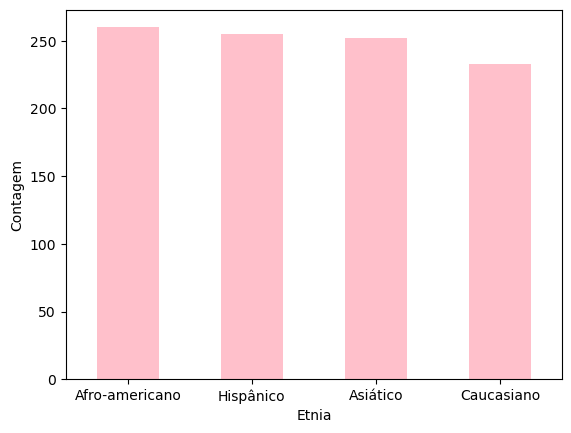

In [138]:
# Visualização das etnias
df_pacientes['Nome_Etnia'].value_counts().plot(kind='bar', color='pink')
plt.xlabel('Etnia')
plt.ylabel('Contagem')
plt.xticks(rotation=0) 
plt.show()

In [141]:
'''
A) TESTE ANOVA

H0: A pressão arterial média é a mesma em todos os grupos étnicos. 
Ha: A pressão arterial é diferente em todos os grupos étnicos

Alpha = 0.05
'''

afro = df_pacientes['Pressao_Arterial'].loc[df_pacientes['Etnia'] == 1]
hispanico = df_pacientes['Pressao_Arterial'].loc[df_pacientes['Etnia'] == 2]
asiatico = df_pacientes['Pressao_Arterial'].loc[df_pacientes['Etnia'] == 3]
caucasiano = df_pacientes['Pressao_Arterial'].loc[df_pacientes['Etnia'] == 0]


f_statistic, p_value = stats.f_oneway(afro, hispanico, asiatico, caucasiano)

alpha = 0.05

if p_value < alpha:
    print("hipótese nula rejeitada")
else:
    print("hipótese nula não rejeitada")
print(p_value)

hipótese nula não rejeitada
0.873800123850745


In [144]:
pressao_por_etnia = {'1': df_pacientes['Pressao_Arterial'].loc[df_pacientes['Nome_Etnia'] == 'Afro-americano'].values,
'2': df_pacientes['Pressao_Arterial'].loc[df_pacientes['Nome_Etnia'] == 'Asiático'].values,
'3': df_pacientes['Pressao_Arterial'].loc[df_pacientes['Nome_Etnia'] == 'Hispânico'].values,
'4': df_pacientes['Pressao_Arterial'].loc[df_pacientes['Nome_Etnia'] == 'Caucasiano'].values,
}

statistic,p_value = stats.f_oneway(*pressao_por_etnia.values())

p_value

0.873800123850745

In [187]:
'''
B) Existe uma associação entre a idade dos pacientes e sua pressão arterial?

i. Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.
ii. Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.


'''

bins = [30, 40, 50, 60]
labels = ['Jovem','Adulto', 'Idoso']
df_pacientes['Faixa_Idade'] = pd.cut(df_pacientes['Idade'], bins=bins, labels=labels, right=False)
bins = [110, 121, 139,190]
labels = ['Normal', 'Pré-Hipertensão','Hipertensão']
df_pacientes['Faixa_Pressao'] = pd.cut(df_pacientes['Pressao_Arterial'], bins=bins, labels=labels, right=False)

In [190]:
tabela_contingencia

Faixa_Pressao,Normal,Pré-Hipertensão,Hipertensão
Faixa_Idade,,,
Jovem,3,32,212
Adulto,0,20,239
Idoso,0,35,204


In [191]:
tabela_contingencia = pd.crosstab(df_pacientes['Faixa_Idade'], df_pacientes['Faixa_Pressao'])


chi2_stat, p_value, dof, expected = chi2_contingency(tabela_contingencia)

alpha = 0.05

if p_value < alpha:
    print("hipótese nula rejeitada")
else:
    print("hipótese nula não rejeitada")
p_value

hipótese nula rejeitada


0.013836680418175405

### 7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

In [171]:
wom_adicional = df_pacientes[['Nome_Genero','Nome_Estado_Saude']].loc[(df_pacientes['Nome_Estado_Saude'] == 'Com condições de saúde adicionais') & (df_pacientes['Nome_Genero'] == 'Feminino')]
men_adicional = df_pacientes[['Nome_Genero','Nome_Estado_Saude']].loc[(df_pacientes['Nome_Estado_Saude'] == 'Com condições de saúde adicionais')  & (df_pacientes['Nome_Genero'] == 'Masculino')]

wom_saudavel = df_pacientes[['Nome_Genero','Nome_Estado_Saude']].loc[(df_pacientes['Nome_Estado_Saude'] == 'Saudável') & (df_pacientes['Nome_Genero'] == 'Feminino')]
men_saudavel = df_pacientes[['Nome_Genero','Nome_Estado_Saude']].loc[(df_pacientes['Nome_Estado_Saude'] == 'Saudável')  & (df_pacientes['Nome_Genero'] == 'Masculino')]



print(tabulate([['Male',men_adicional['Nome_Genero'].count(), men_saudavel['Nome_Genero'].count()], ['Female',wom_adicional['Nome_Genero'].count(),wom_saudavel['Nome_Genero'].count()]],
               headers = ['Com condições de saúde especiais', 'Saudável'],
               tablefmt = 'fancy_grid',stralign='center',
               numalign='center',
               floatfmt=".2f"))

╒════════╤════════════════════════════════════╤════════════╕
│        │  Com condições de saúde especiais  │  Saudável  │
╞════════╪════════════════════════════════════╪════════════╡
│  Male  │               253.00               │   244.00   │
├────────┼────────────────────────────────────┼────────────┤
│ Female │               257.00               │   246.00   │
╘════════╧════════════════════════════════════╧════════════╛


In [221]:
tabela_contingencia = pd.crosstab(df_pacientes['Nome_Genero'],df_pacientes['Nome_Estado_Saude'])
tabela_contingencia

Nome_Estado_Saude,Com condições de saúde adicionais,Saudável
Nome_Genero,,
Feminino,257,246
Masculino,253,244


In [230]:
chi2_stat, p_value, dof, expected = chi2_contingency(tabela_contingencia2)

alpha = 0.05

if p_value < alpha:
    print("Existe associação entre o gênero e a condição de saúde")
else:
    print("Não existe relação entre gênero e condição de saúde")
p_value

Não existe relação entre gênero e condição de saúde


1.0

### 8. Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [212]:
paciente_adicional = df_pacientes["Pressao_Arterial"].loc[df_pacientes['Nome_Estado_Saude'] != 'Saudável']
print('Tamanho amostral: {}'.format(paciente_adicional.count()))
print('Média amostral: {}'.format(paciente_adicional.mean()))
print('Desvio Padrão populacional: {}'.format(df_pacientes['Pressao_Arterial'].std()))

Tamanho amostral: 510
Média amostral: 150.11845194515752
Desvio Padrão populacional: 9.943612581359616


<b>Aplicando na fórmula p/ margem de erro.</b>

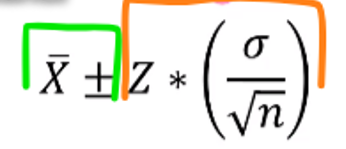

In [215]:
tamanho_amostra = 510
z = 1.96
media_amostral = paciente_adicional.mean()
dp_populacional = df_pacientes["Pressao_Arterial"].std()

margem_erro = (z * (dp_populacional/(math.sqrt(tamanho_amostra))))
margem_mais = media_amostral + margem_erro
margem_menos = media_amostral - margem_erro

print("O intervalo de confiança é entre {}mmHg e {}mmHg".format(margem_menos,margem_mais))
print("O intervalo pequeno indica pouca variabilidade dos dados da amostra, indicando que os dados se concentram em um grupo de valores que tendente a uma distribuição normal")

O intervalo de confiança é entre 149.25544323598413mmHg e 150.9814606543309mmHg
O intervalo pequeno indica pouca variabilidade dos dados da amostra, indicando que os dados se concentram em um grupo de valores que tendente a uma distribuição normal


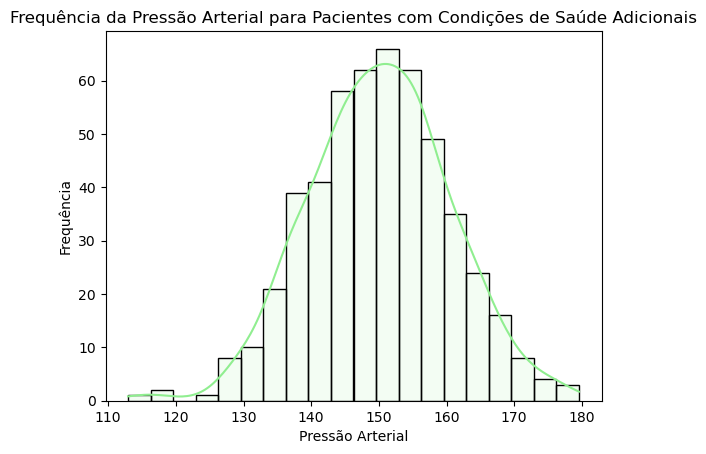

In [216]:
sns.histplot(paciente_adicional, color='lightgreen',kde=True, alpha=0.10)
plt.title('Frequência da Pressão Arterial para Pacientes com Condições de Saúde Adicionais')
plt.xlabel('Pressão Arterial')
plt.ylabel('Frequência')
plt.show()

### 9. A distribuição da pressão arterial na população segue uma distribuição normal?

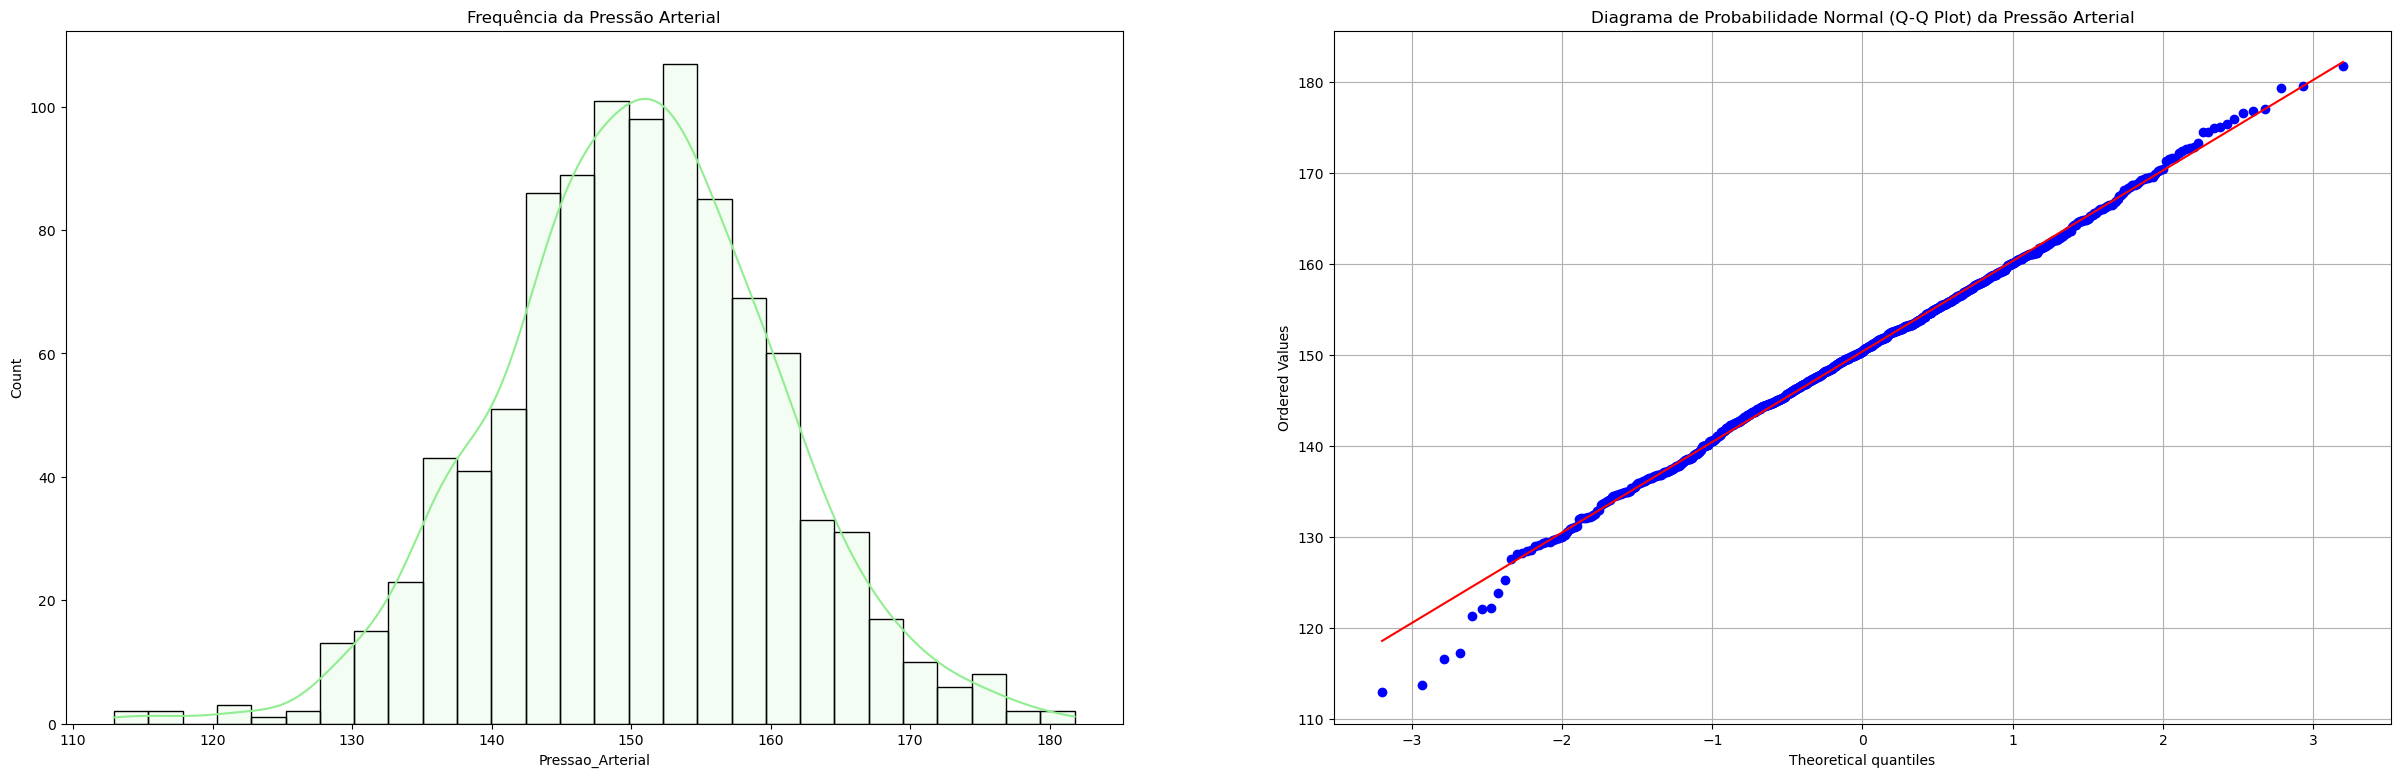

In [218]:
'''
TESTE KS, TABELA DE FREQUENCIA E QQ PLOT
'''

fig, ax = plt.subplots(1,2, figsize=(30,9))

stats.probplot(df_pacientes['Pressao_Arterial'], dist="norm", plot=plt)
plt.title('Diagrama de Probabilidade Normal (Q-Q Plot) da Pressão Arterial')
plt.grid(True)


sns.histplot(df_pacientes['Pressao_Arterial'], color='lightgreen',kde=True, alpha=0.10,ax=ax[0])
ax[0].set_title('Frequência da Pressão Arterial')
plt.show()

In [219]:
pressao_arterial = df_pacientes['Pressao_Arterial']

# Aplicando o teste K-S
resultado_ks = stats.kstest(pressao_arterial, 'norm')

print("Estatística de teste K-S:", resultado_ks.statistic)
print("P-valor:", resultado_ks.pvalue)

# Interpretação do resultado
if resultado_ks.pvalue < 0.05:
    print("os dados seguem uma distribuição normal.")
else:
    print("os dados não podem ser considerados normalmente distribuídos.")

Estatística de teste K-S: 1.0
P-valor: 0.0
os dados seguem uma distribuição normal.


<b>Baseado nos gráficos, podemos identificar o formato de sino e a concentração na linha vermelha do qqplot, apesar de existirem caudas fortes a esquerda que causam o leve desvio dos dois gráficos, a distribuição pode ser considerada normal, confirmamos essa afirmação com base no teste de Kolmogorov-Smirnov.</b>